In [2]:
#ANSWERING QUESTION 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [6]:
#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [17]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# The tech stocks we'll use for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the stock data and store them in a list of DataFrames
stock_data = []
for stock, name in zip(tech_list, company_name):
    data = yf.download(stock, start=start, end=end)
    data['company_name'] = name
    stock_data.append(data)

# Concatenate all the DataFrames
df = pd.concat(stock_data, axis=0)

# Display the top 10 rows
print(df.head(10))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-06-26  186.830002  188.050003  185.229996  185.270004  184.291275   
2023-06-27  185.889999  188.389999  185.669998  188.059998  187.066544   
2023-06-28  187.929993  189.899994  187.600006  189.250000  188.250244   
2023-06-29  189.080002  190.070007  188.940002  189.589996  188.588440   
2023-06-30  191.630005  194.479996  191.259995  193.970001  192.945312   
2023-07-03  193.779999  193.880005  191.759995  192.460007  191.443298   
2023-07-05  191.570007  192.979996  190.619995  191.330002  190.319260   
2023-07-06  189.839996  192.020004  189.199997  191.809998  190.796722   
2023-07-07  191.410004  192.669998  190.240005  190.679993  189.672699   
2023-07-10  189.259995  189.990005  187.039993  188.610001  187.613632   

              Volume company_name  
Date                               
2023-06-26  48088700        APPLE  
202

In [18]:
#Summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,183.895454,185.482609,182.459802,183.981107,183.494365,6.018261e+07
std,10.438760,10.583537,10.346584,10.453787,10.474549,2.475733e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.677800e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.343900e+07
75%,191.089996,192.250000,189.880005,191.289993,190.807404,6.606290e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,2.464214e+08


In [19]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-06-26 to 2024-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


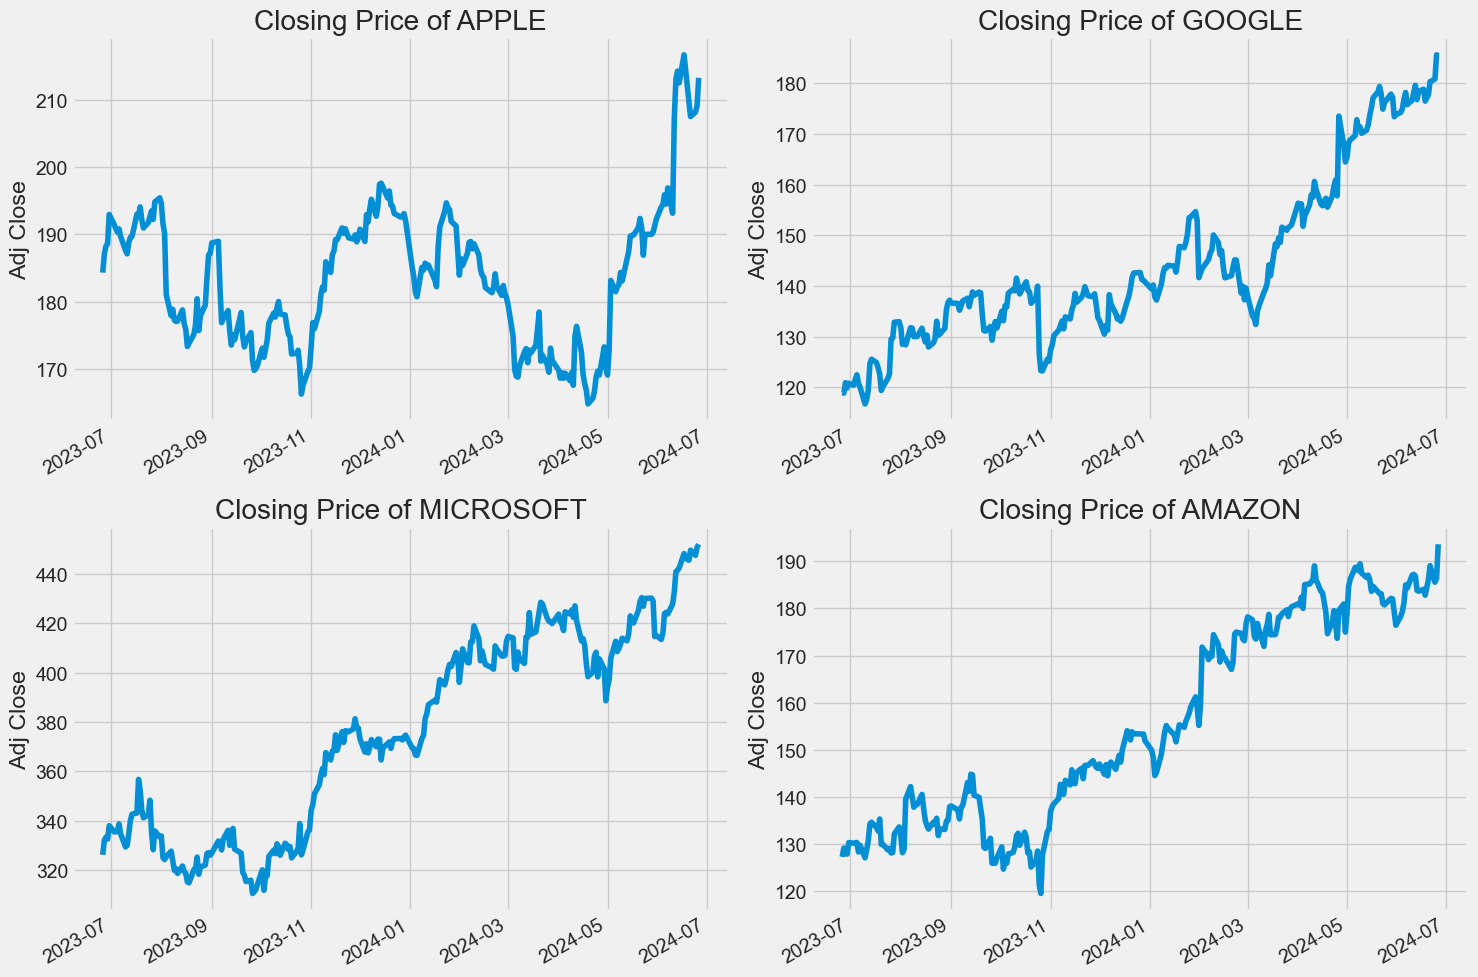

In [21]:
# Plot historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock_df, name) in enumerate(zip(stock_data, company_name), 1):
    plt.subplot(2, 2, i)
    stock_df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")

plt.tight_layout()
plt.show()


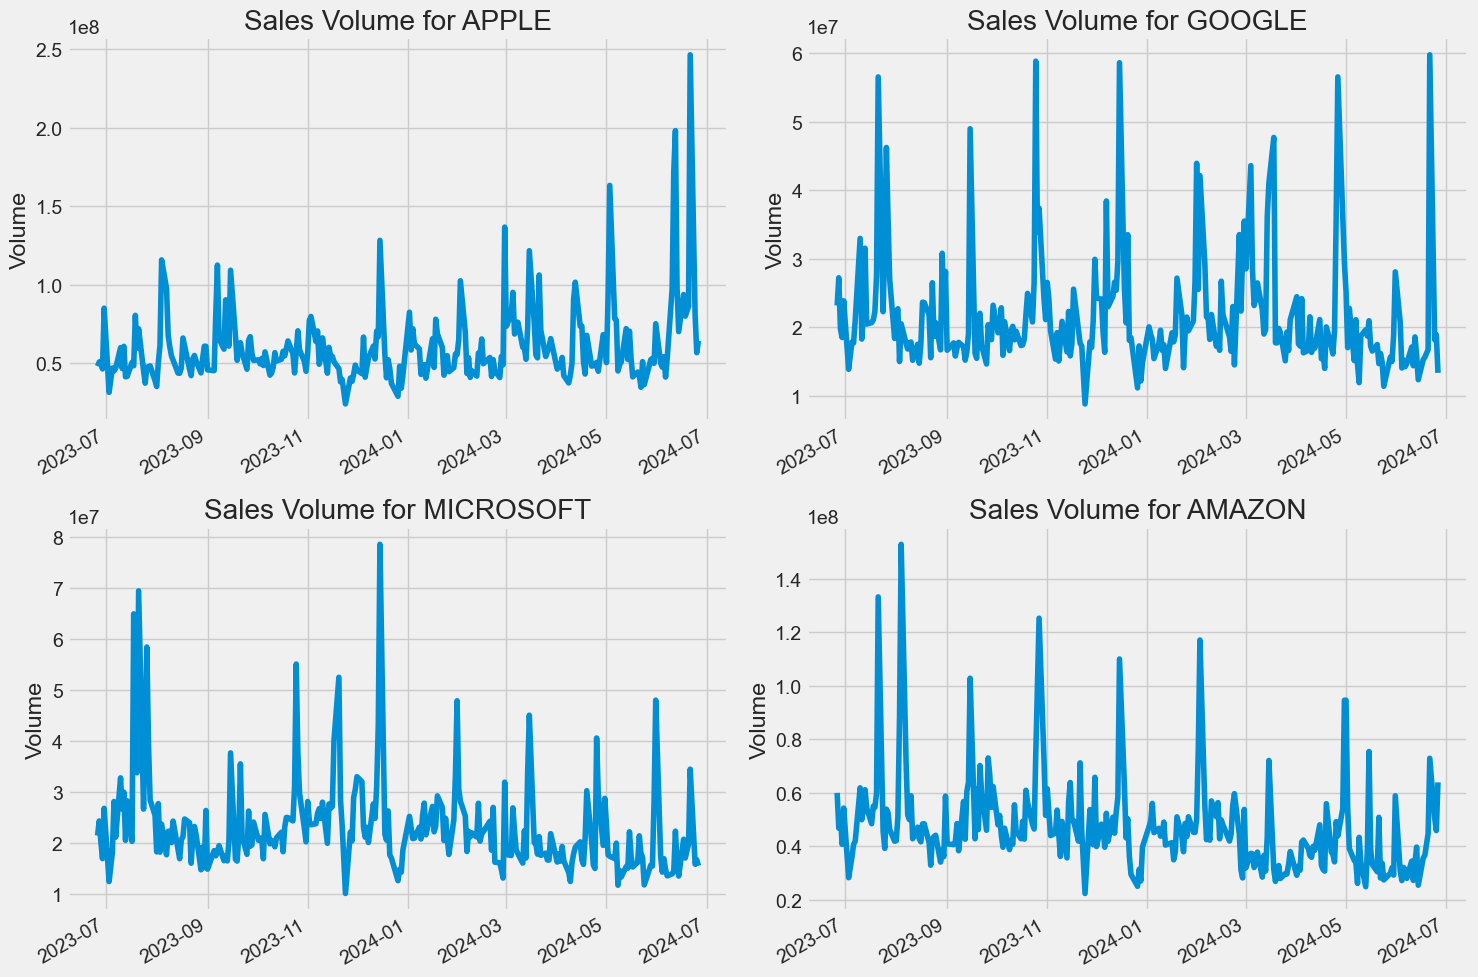

In [25]:
#plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, (stock_df, name) in enumerate(zip(stock_data, company_name), 1):
    plt.subplot(2, 2, i)
    stock_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}")

plt.tight_layout()

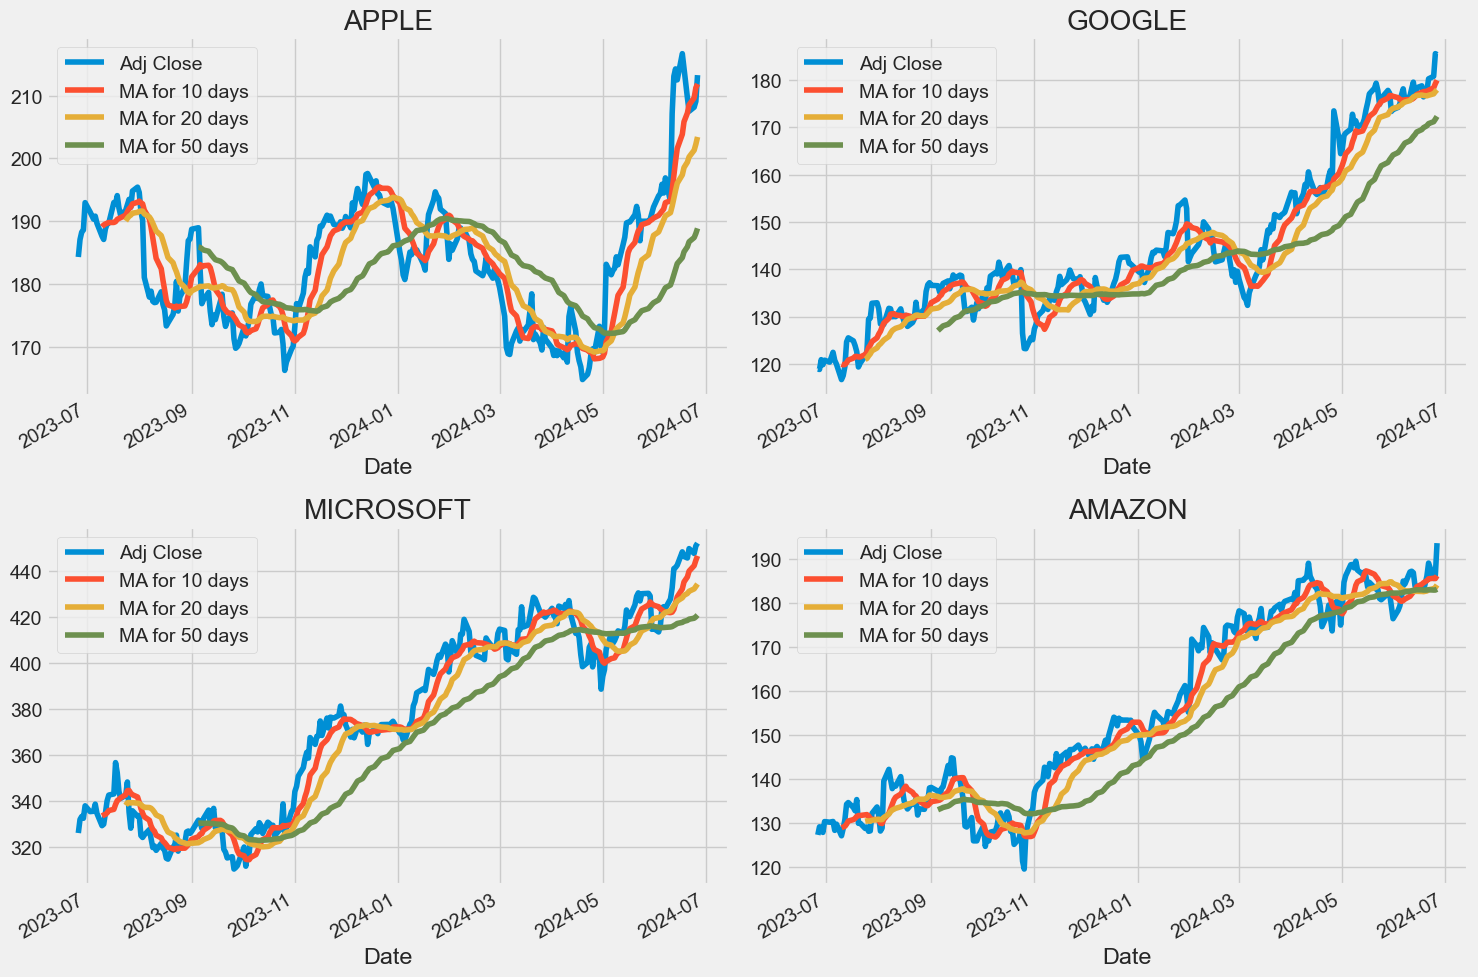

In [28]:
#2. ANSWERING QUESTION 2
#moving averages
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for stock_df in stock_data:
        column_name = f"MA for {ma} days"
        stock_df[column_name] = stock_df['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot for each company
stock_data_dict = {name: df for name, df in zip(company_name, stock_data)}

stock_data_dict['APPLE'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

stock_data_dict['GOOGLE'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

stock_data_dict['MICROSOFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

stock_data_dict['AMAZON'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


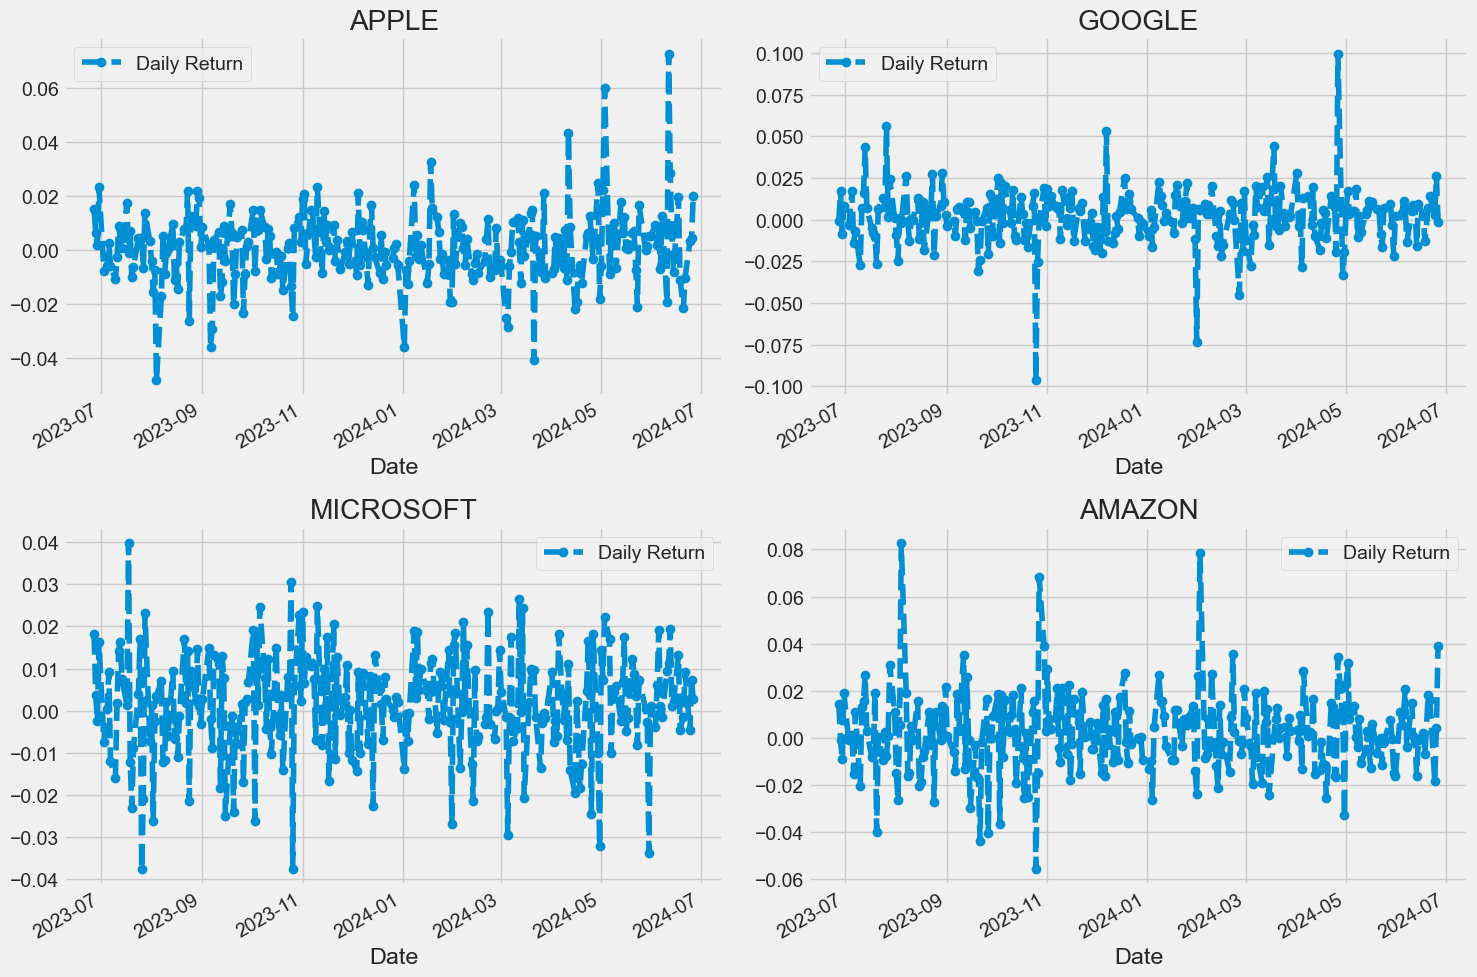

In [35]:
#3. ANSWERING QUESTION 3
# Calculate the daily return percentage
for stock_df in stock_data:
    stock_df['Daily Return'] = stock_df['Adj Close'].pct_change()

# Plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Use a dictionary to map company names to DataFrames
stock_data_dict = {name: df for name, df in zip(company_name, stock_data)}

stock_data_dict['APPLE']['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

stock_data_dict['GOOGLE']['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

stock_data_dict['MICROSOFT']['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

stock_data_dict['AMAZON']['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


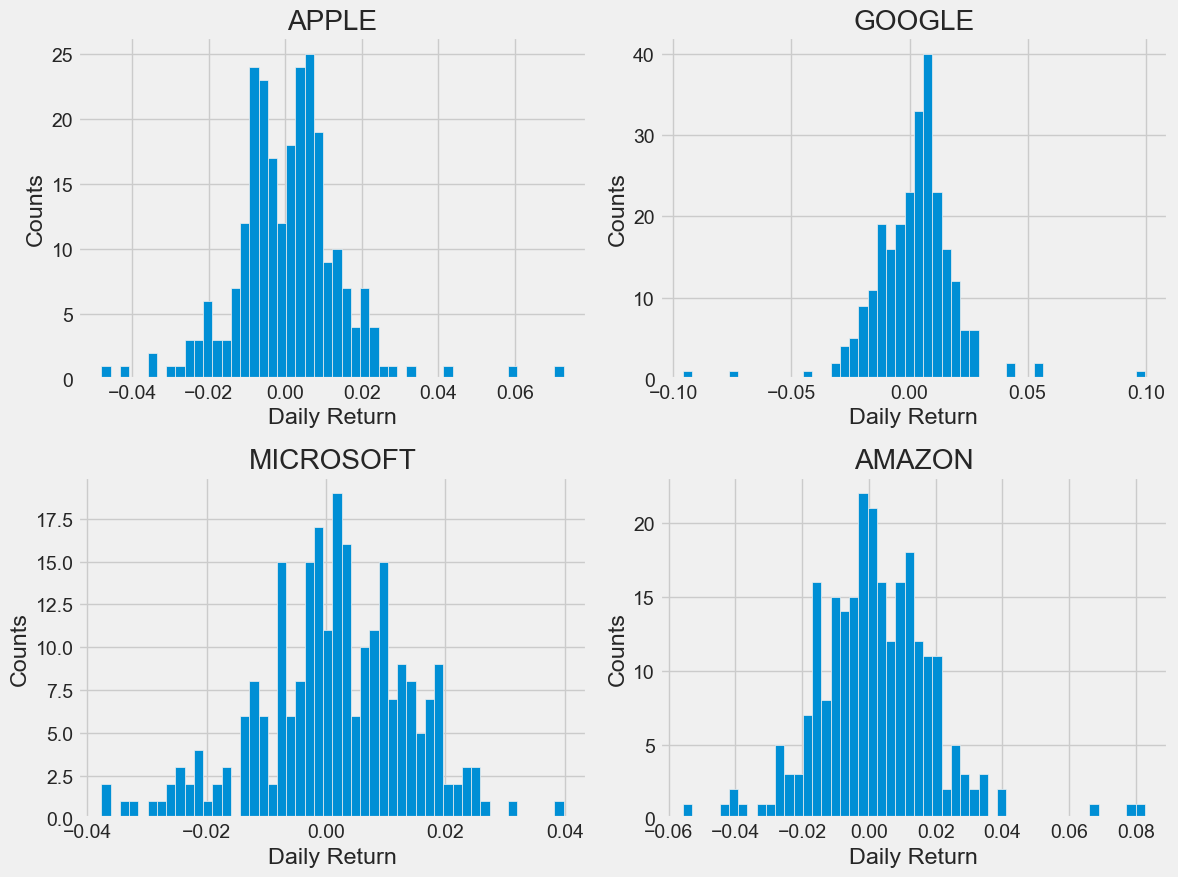

In [36]:
#Overall look at average daily return using a histogram
plt.figure(figsize=(12, 9))

for i, (stock_df, name) in enumerate(zip(stock_data, company_name), 1):
    plt.subplot(2, 2, i)
    stock_df['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(name)

plt.tight_layout()

In [37]:
#4. ANSWERING QUESTION 4
#grab all closing prices for the tech stock list into one dataframe

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

#Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-26,NaN,NaN,NaN,NaN
2023-06-27,0.015059,0.014529,-0.000672,0.018168
2023-06-28,0.006328,-0.001084,0.017394,0.003826
2023-06-29,0.001797,-0.008834,-0.008837,-0.002382
2023-06-30,0.023103,0.019234,0.007999,0.016386


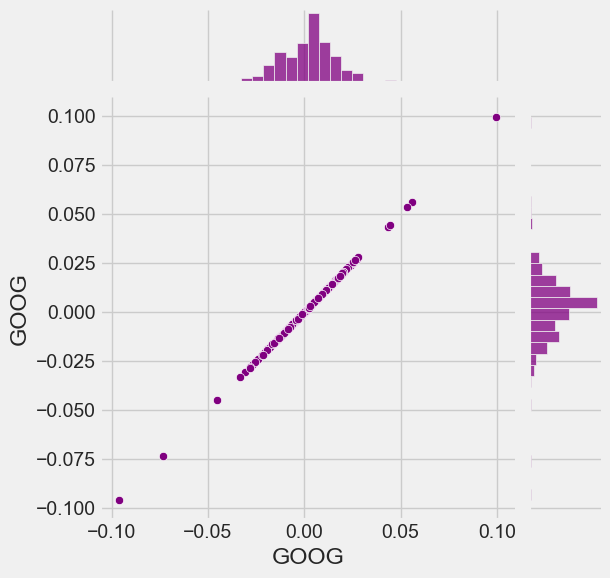

In [38]:
#comparing Google to itself to show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='purple')

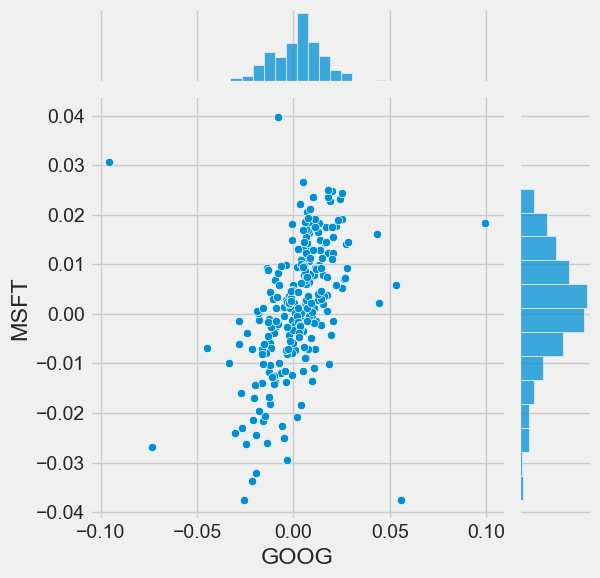

In [39]:
#use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

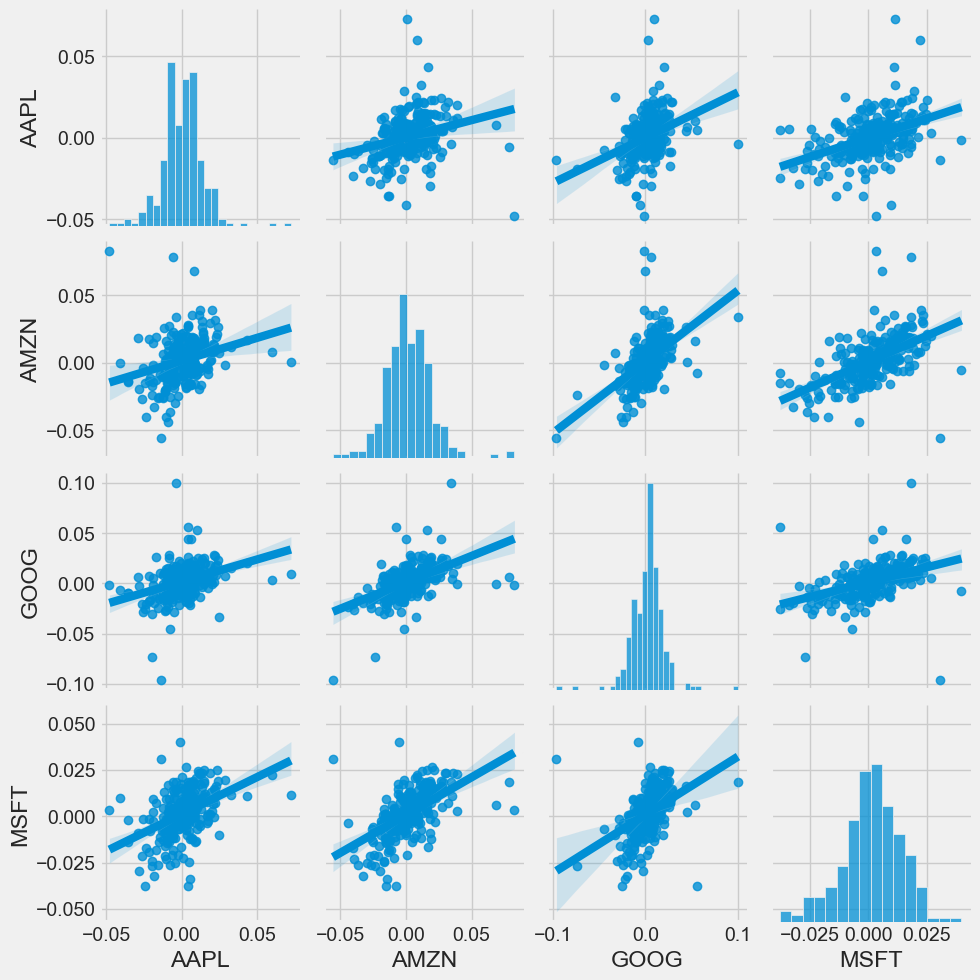

In [40]:
#call pairpoint on dataframe for an automatic visual analysis of all comparisons
sns.pairplot(tech_rets, kind='reg')

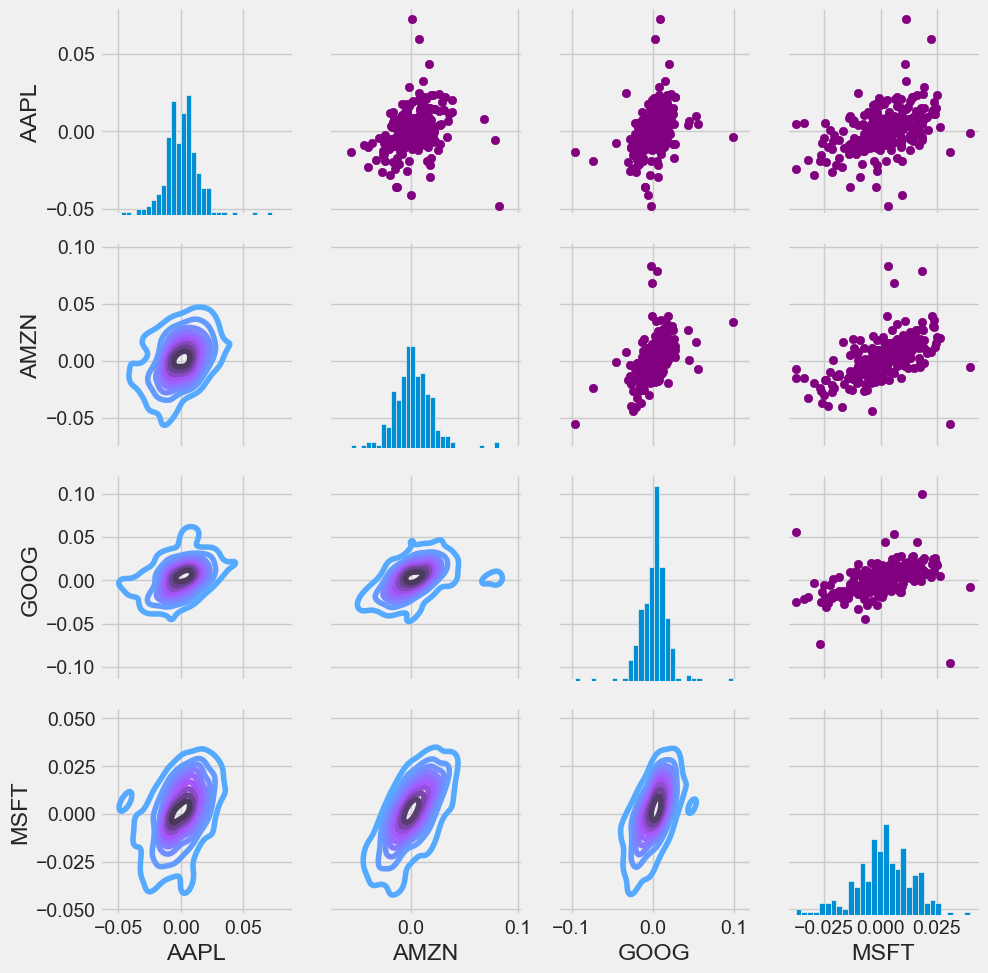

In [41]:
#set up figure by naming it returns_fig, call PairPlot on dataframe
return_fig = sns.PairGrid(tech_rets.dropna())

#using map_upper, specify how the upper triangle will look
return_fig.map_upper(plt.scatter, color='purple')

#define lower triangle in figure, including the plot type(kde) or color of map
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#finally, define diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

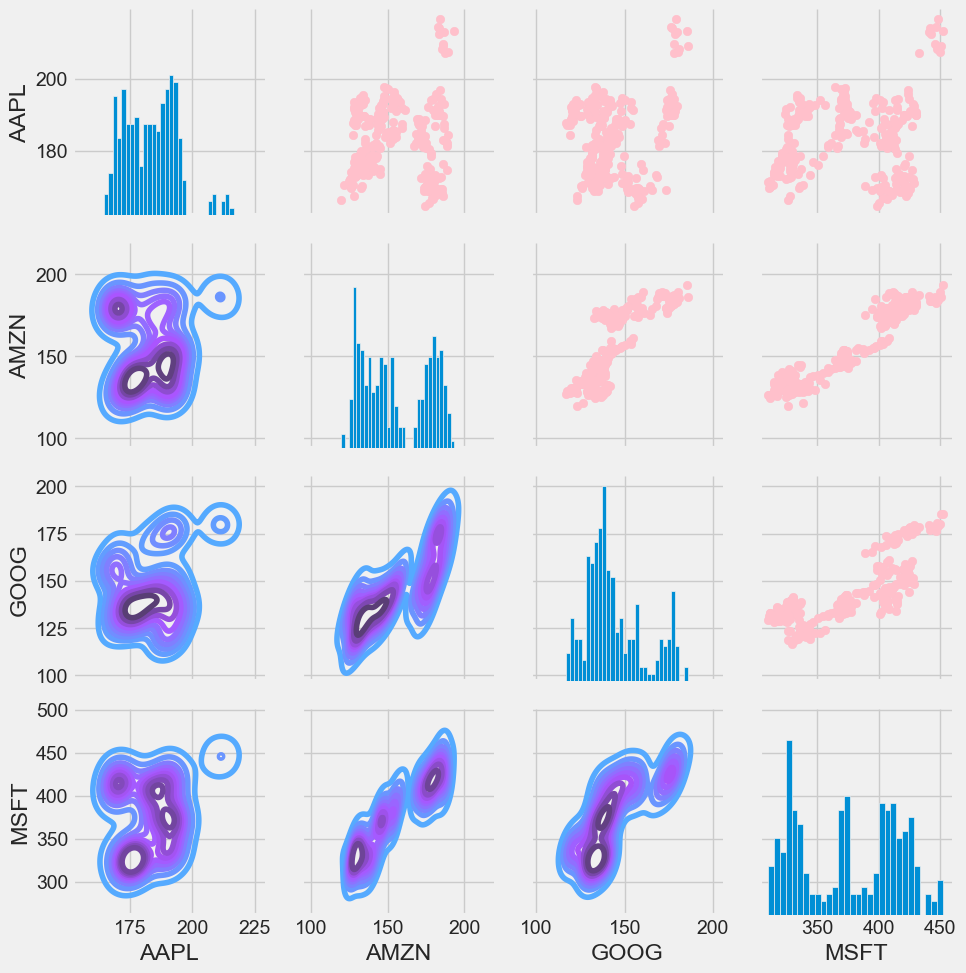

In [43]:
#set up figure by naming it returns_fig, call PairPlot on the dataframe
returns_fig = sns.PairGrid(closing_df)

#using map_upper, specify what the upper triangle will look
returns_fig.map_upper(plt.scatter, color='pink')

#define the lower triangle in the figure, including plot type and color map
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

#define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

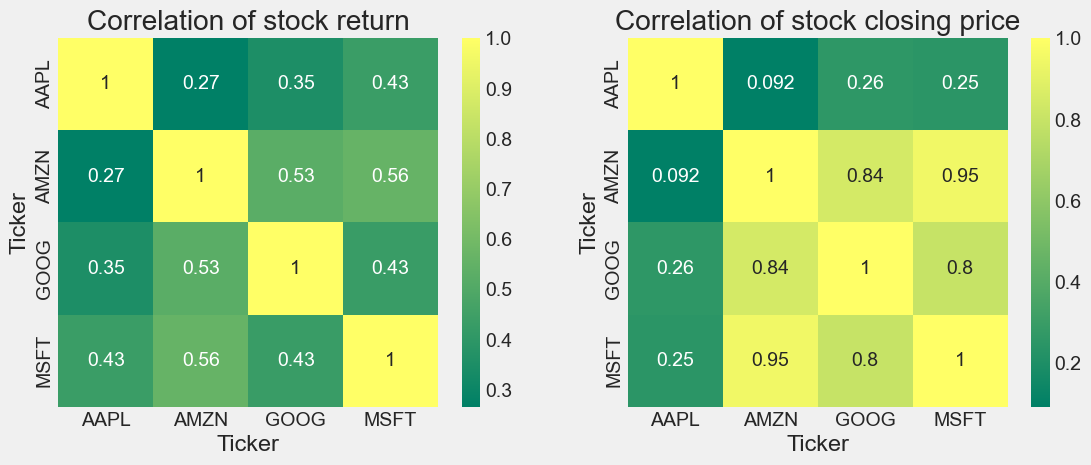

In [44]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

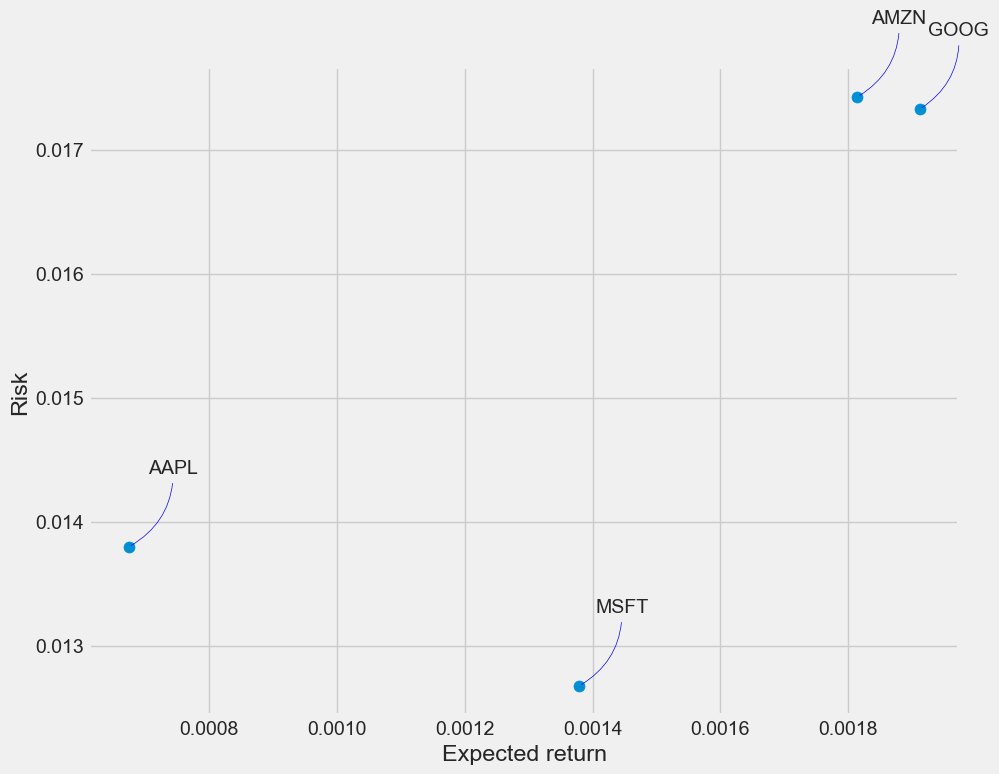

In [45]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [50]:
#6. ANSWERING QUESTION 6
#Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2014-01-01', end=datetime.now())
#show data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273222,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893808,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985933,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864452,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971252,258529600
...,...,...,...,...,...,...
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000


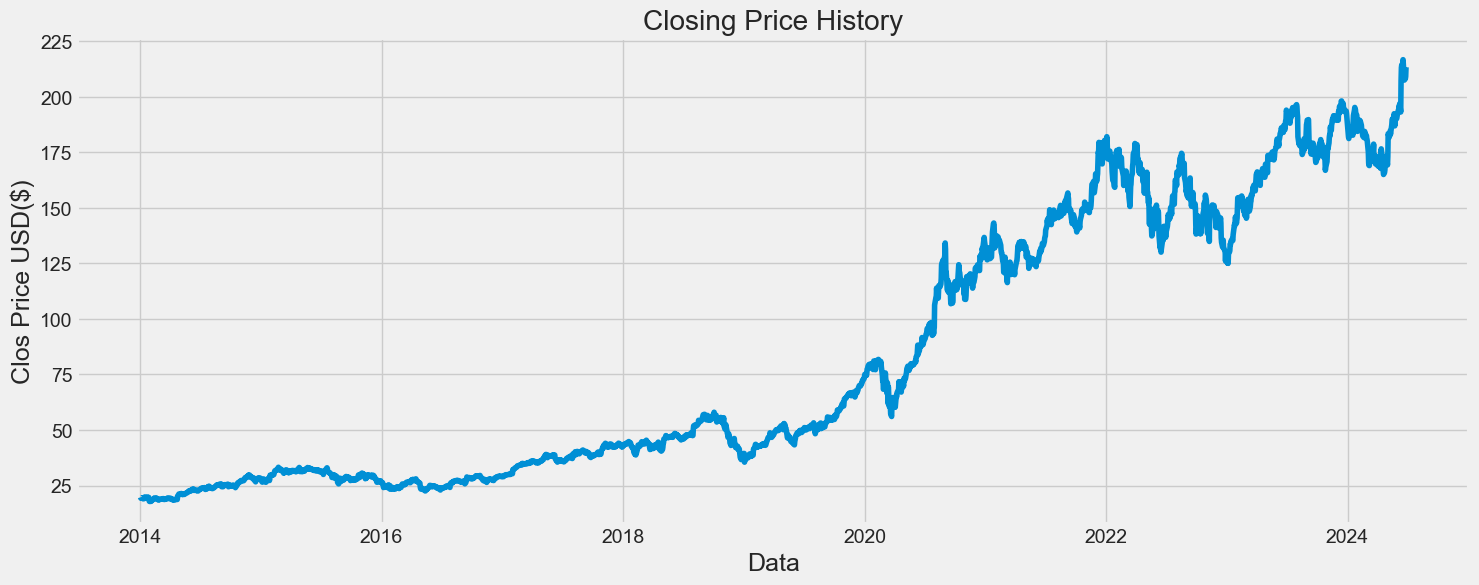

In [51]:
plt.figure(figsize=(16, 6))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Clos Price USD($)', fontsize=18)
plt.show()

In [53]:
#create a new dataframe with only the close column
data = df.filter(['Close'])
#convert the df to a numpy array
dataset = data.values
#get the number of rows to train model on
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len

2507

In [57]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00958329],
       [0.00740079],
       [0.00793069],
       ...,
       [0.95709703],
       [0.96177465],
       [0.98279858]])

In [58]:
#create training data set
#create scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#split data into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape

[array([0.00958329, 0.00740079, 0.00793069, 0.00723194, 0.00784627,
       0.00659963, 0.00595655, 0.00645773, 0.00837259, 0.01034313,
       0.00978448, 0.0073451 , 0.008854  , 0.0092923 , 0.01013117,
       0.00831511, 0.00911086, 0.00120713, 0.00017424, 0.        ,
       0.0001473 , 0.00031435, 0.00161847, 0.00230107, 0.0022867 ,
       0.00357465, 0.00524701, 0.00649905, 0.00649185, 0.00802052,
       0.00794147, 0.00830074, 0.00675232, 0.00563501, 0.00457519,
       0.00498834, 0.00400218, 0.00315611, 0.0050099 , 0.00475303,
       0.00502607, 0.00565118, 0.00585237, 0.00556316, 0.00550748,
       0.00559371, 0.00652239, 0.0066158 , 0.0055452 , 0.00447461,
       0.00484285, 0.00567992, 0.00565478, 0.00519492, 0.00594398,
       0.00707925, 0.0081211 , 0.00718523, 0.00676848, 0.0066607 ])]
[np.float64(0.006639155357449883)]

[array([0.00958329, 0.00740079, 0.00793069, 0.00723194, 0.00784627,
       0.00659963, 0.00595655, 0.00645773, 0.00837259, 0.01034313,
       0.00978448, 0.0

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

print("Model training complete")

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid